# Programa de Pós-Graduação em Computação Aplicada (UnB)
## Disciplina: ANÁLISE ESTATÍSTICA DE DADOS E INFORMAÇÕES - Turma 01 - 2023/1
## Professor: João Gabriel de Moraes Souza
## Aluno: Francisco Gonçalves de Araújo Filho
## Matrícula: 231109675
### Prova 1 - Questão 3
A questão 3 irá se basear na aplicação prática de um problema de ANOVA. Esses problemas são originados de dados reais aplicados em problemas de Negócios. A questão irá abordar a aplicação do problema Vendas de Varejo on-line. Esse problema trata-se do objetivo de as **médias de quantidades e preços dos produtos agrupados por países**. Com esses dados pede-se

#### Item a) Elaborar uma análise descritiva da base de dados, análise gráfica e por tabelas.

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
cols = ['NumeroFatura', 'CodigoProduto', 'Descricao',
        'Quantidade', 'DataFatura', 'PrecoUnitario',
        'IDCliente', 'Pais']
# Ler arquivoa CSV
df1 = pd.read_csv('ano_2009-2010.csv', encoding='latin1')
df2 = pd.read_csv('ano_2010-2011.csv', encoding='latin1')

# Concatenar os dois DataFrames
df = pd.concat([df1, df2], ignore_index=True)
df.columns = cols

# Imprimir o DataFrame resultante
df

,NumeroFatura,CodigoProduto,Descricao,Quantidade,DataFatura,PrecoUnitario,IDCliente,Pais
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [3]:
# Exclui todas faturas canceladas
df = df[~df['NumeroFatura'].str.startswith(('C', 'c'))]

# Exclui linhas que tenham valor e quantidades menores ou igual a zero
df = df[df["Quantidade"] > 0]
df = df[df["PrecoUnitario"] > 0]

df

,NumeroFatura,CodigoProduto,Descricao,Quantidade,DataFatura,PrecoUnitario,IDCliente,Pais
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041670 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   NumeroFatura   1041670 non-null  object 
 1   CodigoProduto  1041670 non-null  object 
 2   Descricao      1041670 non-null  object 
 3   Quantidade     1041670 non-null  int64  
 4   DataFatura     1041670 non-null  object 
 5   PrecoUnitario  1041670 non-null  float64
 6   IDCliente      805549 non-null   float64
 7   Pais           1041670 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 71.5+ MB


In [7]:
df.describe()

,Quantidade,PrecoUnitario,IDCliente
count,1.041670e+06,1.041670e+06,805549.000000
mean,1.096346e+01,4.076683e+00,15331.954970
std,1.265150e+02,5.144773e+01,1696.737039
min,1.000000e+00,1.000000e-03,12346.000000
25%,1.000000e+00,1.250000e+00,13982.000000
50%,3.000000e+00,2.100000e+00,15271.000000
75%,1.000000e+01,4.130000e+00,16805.000000
max,8.099500e+04,2.511109e+04,18287.000000


In [13]:
# Dropa colunas desnecessárias
colunas_remover = ['NumeroFatura', 'Descricao', 'DataFatura', 'IDCliente']
df = df.drop(columns=colunas_remover)
df

,CodigoProduto,Quantidade,PrecoUnitario,Pais
0,85048,12,6.95,United Kingdom
1,79323P,12,6.75,United Kingdom
2,79323W,12,6.75,United Kingdom
3,22041,48,2.10,United Kingdom
4,21232,24,1.25,United Kingdom
...,...,...,...,...
1067366,22899,6,2.10,France
1067367,23254,4,4.15,France
1067368,23255,4,4.15,France
1067369,22138,3,4.95,France


In [21]:
# Gerar o DataFrame derivado com as médias
df_medias = df.groupby(['Pais', 'CodigoProduto']).mean().reset_index()
df_medias

,Pais,CodigoProduto,Quantidade,PrecoUnitario
0,Australia,10002,18.0,0.85
1,Australia,15036,600.0,0.72
2,Australia,15056BL,3.0,5.95
3,Australia,15058B,2.0,7.95
4,Australia,16161P,300.0,0.34
...,...,...,...,...
28360,West Indies,84508A,2.0,2.55
28361,West Indies,84795B,1.0,7.95
28362,West Indies,84827,9.0,0.65
28363,West Indies,84944,4.0,4.25


In [22]:
# Mapear os países para códigos
paises = df_medias['Pais'].unique()  # Obtém os países únicos
codigos = range(1, len(paises) + 1)  # Gera os códigos para cada país

# Criar um dicionário de mapeamento
mapeamento = dict(zip(paises, codigos))

# Aplicar o mapeamento na coluna "Pais"
df_medias['Pais'] = df_medias['Pais'].map(mapeamento)

# Dropar a coluna "CodigoProduto"
df_medias.drop('CodigoProduto', axis=1, inplace=True)

df_medias = df_medias.dropna()

df_medias

,Pais,Quantidade,PrecoUnitario
0,1,18.0,0.85
1,1,600.0,0.72
2,1,3.0,5.95
3,1,2.0,7.95
4,1,300.0,0.34
...,...,...,...
28360,43,2.0,2.55
28361,43,1.0,7.95
28362,43,9.0,0.65
28363,43,4.0,4.25


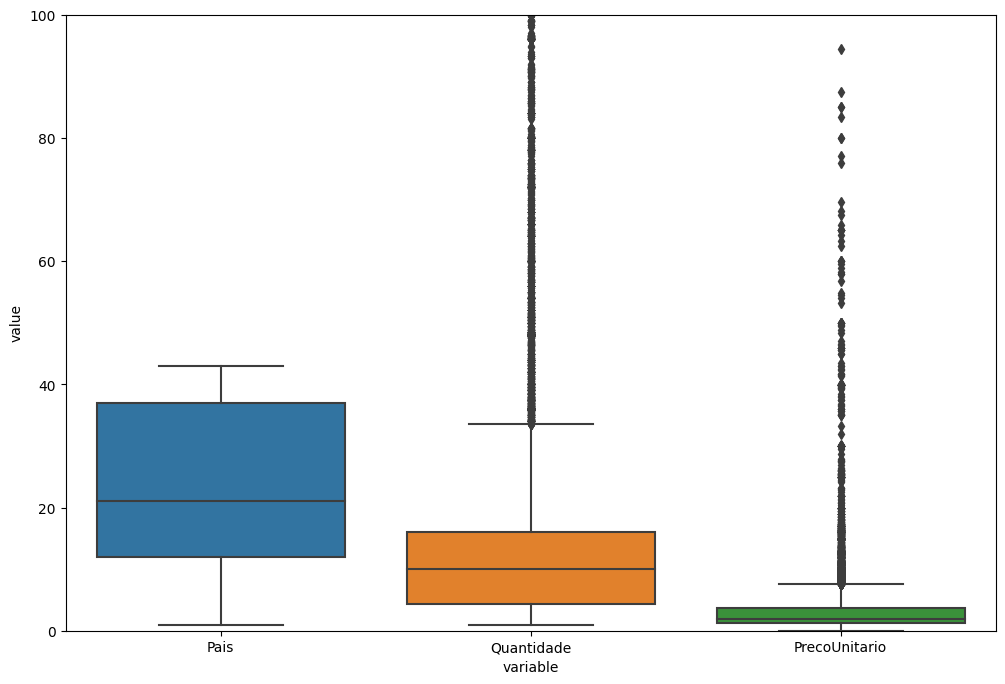

In [26]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="variable", y="value", data=pd.melt(df_medias))
ax.set_ylim(0, 100)
plt.show()